In [1]:
import pandas as pd
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import json
import jieba
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import emoji
from snownlp import SnowNLP

In [2]:
df = pd.read_json(r"./spider_changan/changan12/youku.json", orient="records", lines=True)
# df[df["num"] == 2]["current_page"].unique()
# df["num"].unique()
# df[df["type"] == "hot"]
# df["num"].value_counts()

In [3]:
df["sentiments"] = df["comment"].map(lambda i: SnowNLP(i).sentiments)

# 处理emoji

In [90]:
# 统计Emoji AND 切割评论
with open(stopwords_path, 'r', encoding='utf-8') as f_stop:
    stop_seg_list = f.readlines()
stop_seg_list.extend(['真的', '就是', '没有', '这个', '感觉', '一个', '怎么'])

userdict_list = ['易烊千玺', '雷佳音']
for word in userdict_list:
    jieba.add_word(word)

emoji_dir = {}
mywordlist = []
for comment in df["comment"].values:
    emoji_list = emoji.emoji_lis(comment)
    for ej in emoji_list:
        comment = comment.replace(ej["emoji"], "")
        if ej["emoji"] in emoji_dir:
            emoji_dir[ej["emoji"]] += 1
        else:
            emoji_dir[ej["emoji"]] = 1

    for seg in jieba.cut(comment, cut_all=False):
        if (seg.strip() not in stop_seg_list) and len(seg.strip()) > 1:
            mywordlist.append(seg)
text = " ".join(mywordlist)

In [ ]:
# Emoji 风玫瑰
amount = 15
emoji_pre = sorted(emoji_dir.items(), key=lambda x: x[1], reverse=True)[:amount]
print(emoji_pre)
emoji_pre = pd.DataFrame(emoji_pre, columns=["emoji", "frequency"])
emoji_pre["angles"] = np.linspace(0, 2 * np.pi, amount, endpoint=False)
width = 2 * np.pi / amount - 0.04
emoji_font = matplotlib.font_manager.FontProperties(fname="/home/zh/my_font/EmojiOneColor-SVGinOT.ttf")
zh_font = matplotlib.font_manager.FontProperties(fname="/home/zh/my_font/msyh.ttc")

def mybar(x, height, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.bar(x, height, color=cmap(height), **kwargs)
def mybar_(x, height, color, **kwargs):
    cmap = lambda x: plt.cm.hot_r(x / 500.)
    plt.bar(x, np.log(height), color=cmap(height), **kwargs)

fig, ax = plt.subplots(subplot_kw={"polar": True}, figsize=(7,7))
ax.bar(emoji_pre["angles"], emoji_pre["frequency"], alpha=0.6, width=width, color="r")
ax.set_title("评论中最常出现的Emoji", fontproperties=zh_font, fontsize="xx-large")
ax.set_rlabel_position(72)
ax.set_thetagrids((emoji_pre["angles"]) * 180 / np.pi, fontproperties=emoji_font,
                  labels=emoji_pre["emoji"], fontsize="xx-large")
fig.savefig("frequency_emoji.png", dpi=300)
plt.show()

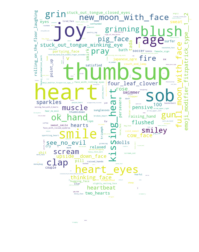

In [30]:
# Emoji 词云
mask = imread("/home/zh/Pictures/timg.jpeg")
w = WordCloud(background_color="white", max_font_size=100, mask=mask).generate_from_frequencies(emoji_dir)
plt.imshow(w, interpolation="bilinear")
w.to_file("./emoji.png")
plt.axis("off")
plt.show()

# sentiments

In [78]:
# stopwords_path = "./stopwords"
zhfont = "/home/zh/my_font/msyh.ttc"
back_coloring = imread("/home/zh/Pictures/timg.jpeg")
def wordcloud_gen(cond, img, img_c):
    stopwords_path = "./stopwords"
    with open(stopwords_path, 'r', encoding='utf-8') as f_stop:
        stop_seg_list = f_stop.readlines()
    stop_seg_list.extend(['真的', '就是', '没有', '这个', '感觉', '一个', '怎么'])
    userdict_list = ['易烊千玺', '雷佳音']
    for word in userdict_list:
        jieba.add_word(word)

    emoji_dir = {}
    mywordlist = []
    for comment in df[cond]["comment"].values:
        emoji_list = emoji.emoji_lis(comment)
        for ej in emoji_list:
            comment = comment.replace(ej["emoji"], "")
            if ej["emoji"] in emoji_dir:
                emoji_dir[ej["emoji"]] += 1
            else:
                emoji_dir[ej["emoji"]] = 1

        for seg in jieba.cut(comment, cut_all=False):
            if (seg.strip() not in stop_seg_list) and len(seg.strip()) > 1:
                mywordlist.append(seg)
    text = " ".join(mywordlist)
    
    wc = WordCloud(background_color="white", max_words=2000, mask=back_coloring,
                   max_font_size=100, margin=2, font_path="/home/zh/my_font/msyh.ttc").generate(text)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(wc, interpolation="bilinear")
    ax[0].axis("off")
    wc.to_file(img)

    # create coloring from image
    image_colors_byImg = ImageColorGenerator(back_coloring)
    ax[1].imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
    ax[1].axis("off")
    wc.to_file(img_c)

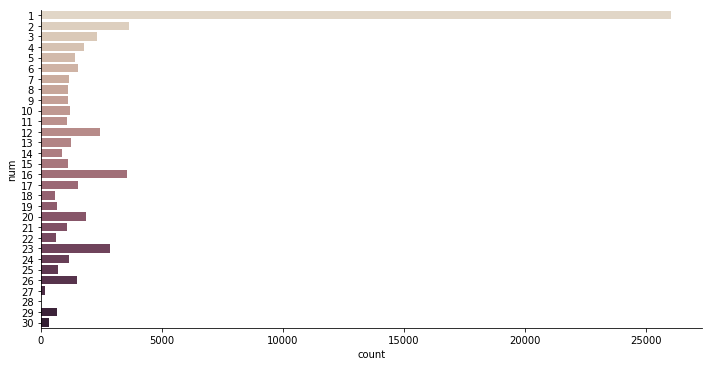

In [20]:
catplot = sns.catplot(y="num", kind="count", palette="ch:.25", data=df, aspect=2)

In [11]:
bins = [0, 0.3, 0.7, 1]
labels = ["low", "middle", "high"]
df["senti_cat"] = pd.cut(df["sentiments"], bins, labels=labels, precision=5, include_lowest=True)

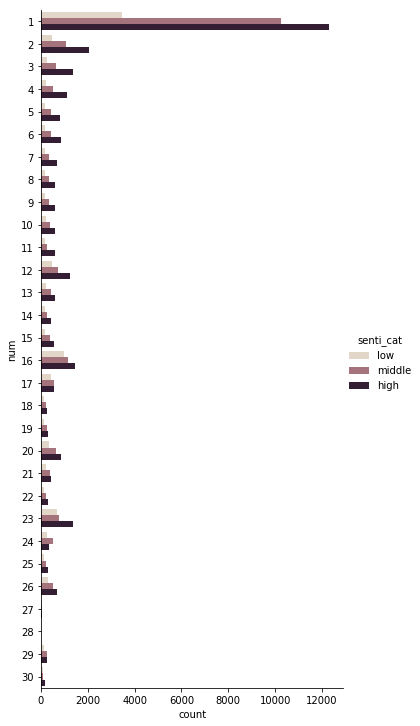

In [26]:
catplot = sns.catplot(y="num", hue="senti_cat", data=df, kind="count", palette="ch:.25", aspect=0.5, height=5)
# catplot.savefig("sns_style_update.jpg", dpi=300, bbox_inches="tight")

KeyboardInterrupt: 

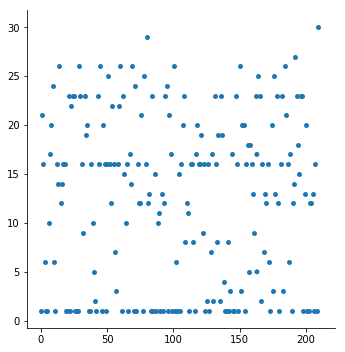

In [31]:
catplot = sns.catplot(x="sentiments", y="num", hue="senti_cat", data=df)

In [51]:
# 评论人数 好像没什么用 没有登录用户
len(df["user_id"].unique())
df["user_id"].value_counts().iloc[:15]

65299

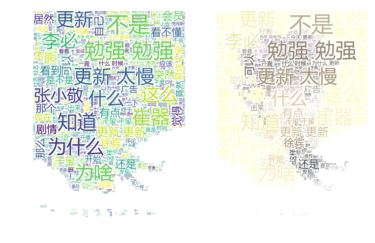

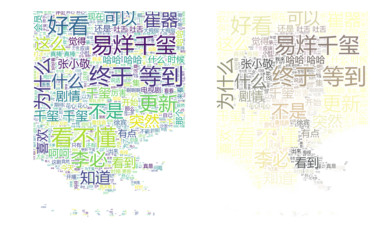

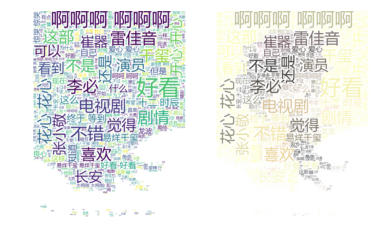

In [60]:
wordcloud_gen(df["senti_cat"] == "low", "./low_cond.jpg", "./low_cond_c.jpg")
wordcloud_gen(df["senti_cat"] == "middle", "./middle_cond.jpg", "./middle_cond_c.jpg")
wordcloud_gen(df["senti_cat"] == "high", "./high_cond.jpg", "./high_cond_c.jpg")

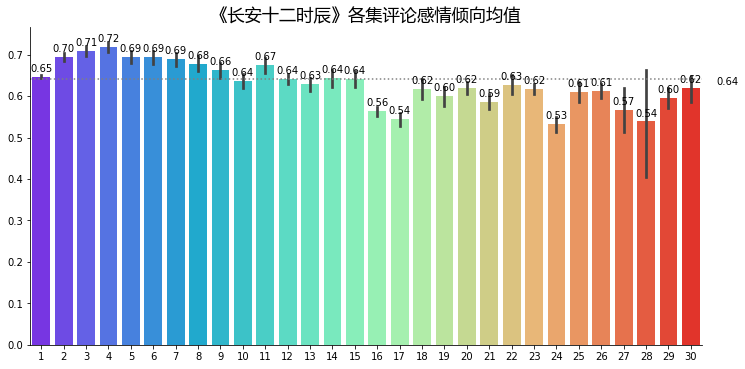

In [114]:
def tic(x, y, color, **kwargs):
    print("x : ", x)
#     plt.text(x, y + 0.05, s="{:.2f}".format(y), **kwargs)

zh_font = matplotlib.font_manager.FontProperties(fname="/home/zh/my_font/msyh.ttc")
grid = sns.catplot(x="num", y="sentiments", data=df, kind="bar", aspect=2, palette="rainbow")
mean = df["sentiments"].mean()
grid.map(plt.axhline, y=mean, ls=":", c=".5")

grid.fig.text(1, 0.8, "{:.2f}".format(mean))
grid.axes[0, 0].set_title("《长安十二时辰》各集评论感情倾向均值", fontproperties=zh_font, fontsize="xx-large")
X = np.arange(len(df["num"].unique()))
Y = df.groupby("num")["sentiments"].mean().values
for x, y in zip(X, Y):
    grid.axes[0, 0].text(x, y + 0.02, "{:.2f}".format(y), horizontalalignment="center", verticalalignment='center')

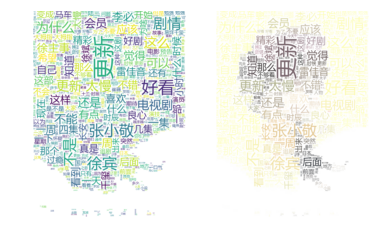

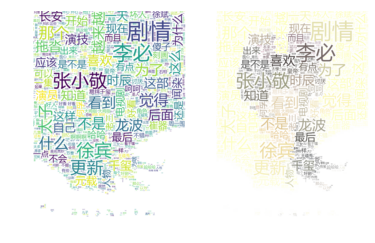

In [115]:
wordcloud_gen(df["num"] == 16, "./decrease_fast_16.jpg", "./decrease_fast_16_c.jpg")
wordcloud_gen(df["num"] == 25, "./lowest_senti_25.jpg", "./lowest_senti_25_c.jpg")